In [4]:
# Problem Statement
'''
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of Education, Lunch and Test Preparation course
'''

"\nThis project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of Education, Lunch and Test Preparation course\n"

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('stud.csv')

In [7]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
df.shape

(1000, 8)

In [9]:
# Dataset Information
'''
gender - male/female
race_ethnicity - group A,B,C,D,E
parental_level_of_education - bachelor's degree, some college, master's degree, associate's degree, high school
lunch - standard, free/reduced
test_preparation_course - completed or none
math_score
reading_score
writing_score
'''

# Data Checks to Perform
'''
check missing values
check duplicates
check data type
check the number of unique values of each column
check statistic of data set
check various categories present in the different categorical column
'''

'\ncheck missing values\ncheck duplicates\ncheck data type\ncheck the number of unique values of each column\ncheck statistic of data set\ncheck various categories present in the different categorical column\n'

In [10]:
print(df.isna().sum())

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64


In [11]:
print(df.duplicated().sum())

0


In [12]:
# check null and dtypes
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None


In [13]:
print(df.nunique())

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64


In [14]:
print(df.describe())

       math_score  reading_score  writing_score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


In [15]:
print('categories in gender variable: ', end=' ')
print(df['gender'].unique())

print('categories i race_ethnicity variable: ', end=' ')
print(df['race_ethnicity'].unique())

print('categories in parental_level_of_education variable: ', end=' ')
print(df['parental_level_of_education'].unique())

print('categories in lunch variable: ', end=' ')
print(df['lunch'].unique())

print('categories in test_preparation_course variable: ', end=' ')
print(df['test_preparation_course'].unique())

categories in gender variable:  ['female' 'male']
categories i race_ethnicity variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
categories in parental_level_of_education variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in lunch variable:  ['standard' 'free/reduced']
categories in test_preparation_course variable:  ['none' 'completed']


In [16]:
# define numerical and categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('we have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nwe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

we have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

we have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [17]:
# adding columns for total_score & average
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total_score']/3

In [18]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f'number of students with full marks in maths: {math_full}')
print(f'number of students with full marks in writing: {writing_full}')
print(f'number of students with full marks in reading: {reading_full}')

number of students with full marks in maths: 7
number of students with full marks in writing: 14
number of students with full marks in reading: 17


In [19]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f'number of students with less than 20 marks in maths: {math_less_20}')
print(f'number of students with less than 20 marks in writing: {writing_less_20}')
print(f'number of students with less than 20 marks in reading: {reading_less_20}')

number of students with less than 20 marks in maths: 4
number of students with less than 20 marks in writing: 3
number of students with less than 20 marks in reading: 1


In [20]:
# Exploring Data to visualize average score distribution
'''
histogram
kernel distribution function
'''

'\nhistogram\nkernel distribution function\n'

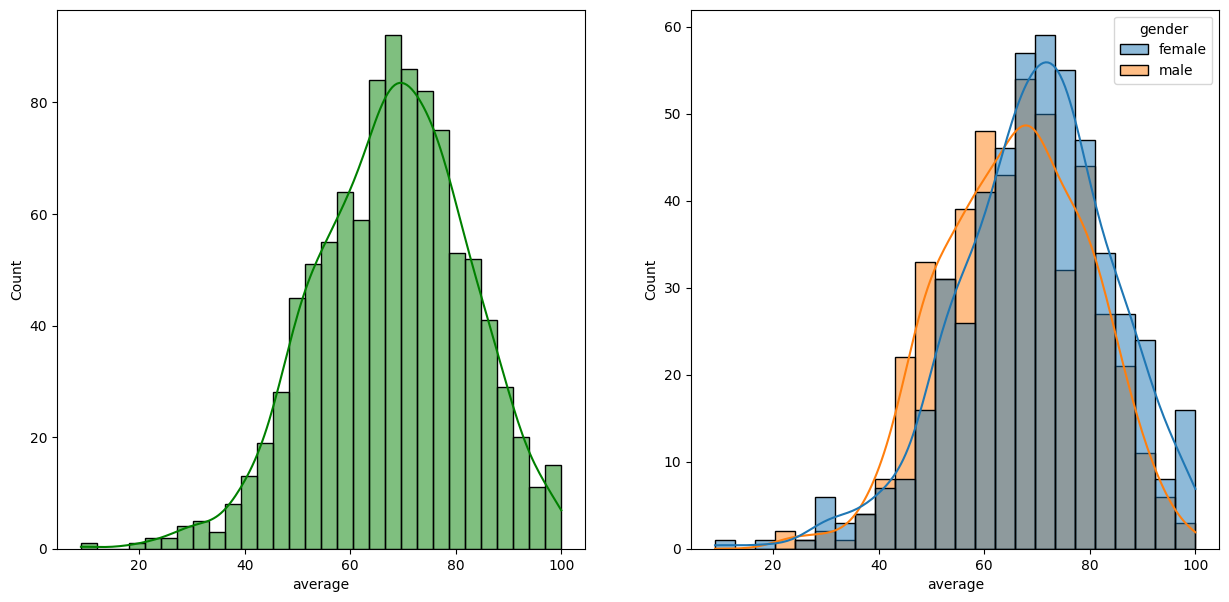

In [21]:
fig, axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='average', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='average', kde=True, hue='gender')
plt.show()

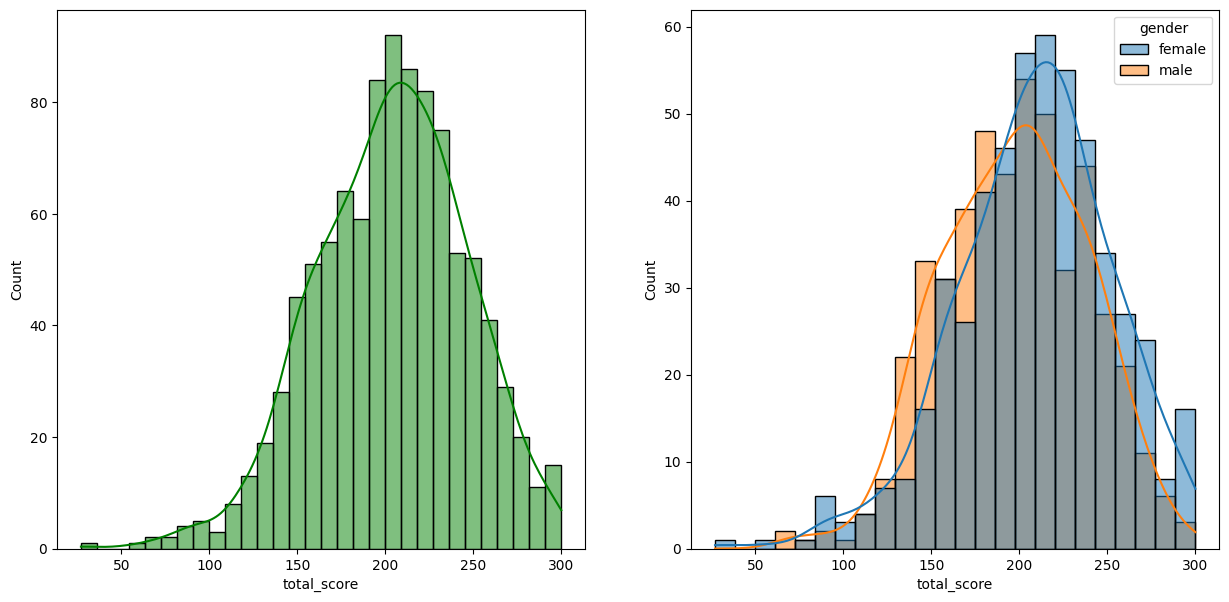

In [22]:
fig, axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='total_score', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='total_score', kde=True, hue='gender')
plt.show()

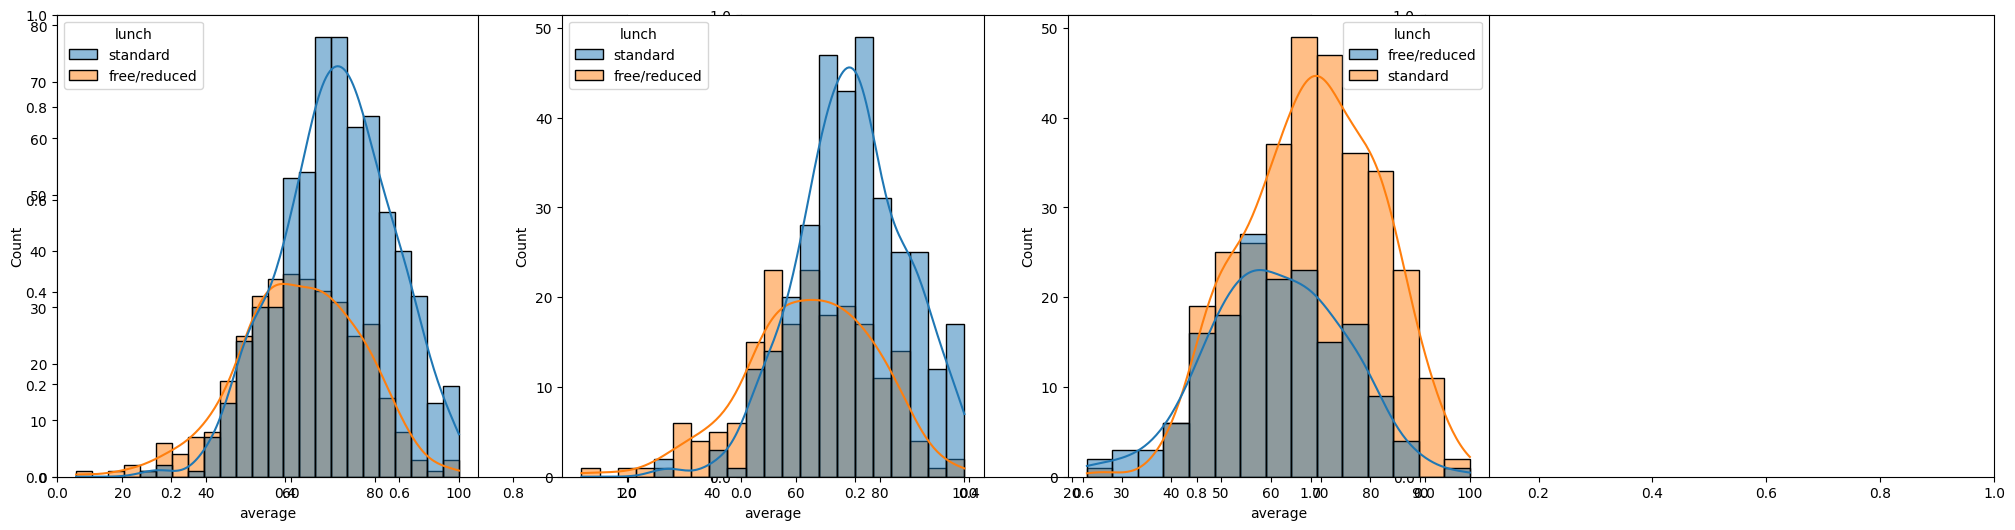

In [23]:
plt.subplots(1,3, figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df, x='average', kde=True, hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='lunch')
plt.show()

In [24]:
# female students tend to perform well than male students

# standard lunch helps perform well in exams
# standard lunch helps perform well in exams, be it male or female

# parent's education don't help students perform well in exams
# parents whose education is of associate or master degree then their male child tend to perform better in exams
# there is no effect of parent's education on female students

# students of group A and B tend to perform poorly in exams
# students of group A and B tend to perform poorly in exams irrespective of whether they are male or female

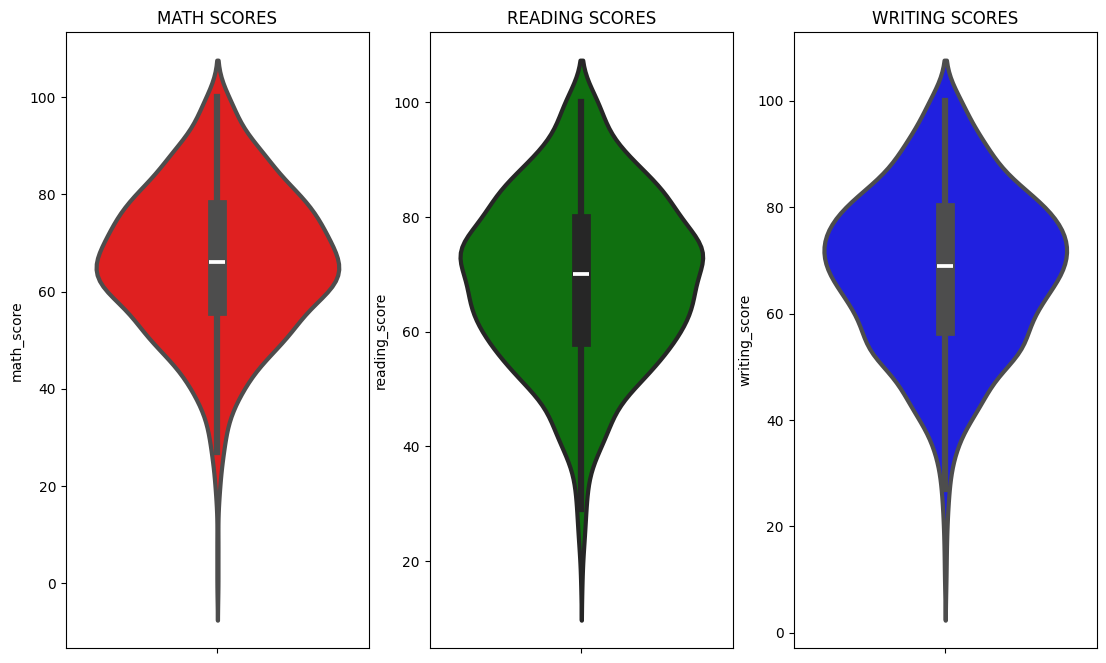

In [25]:
# Maximum score of students in all three subjects

plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score', data=df, color='red', linewidth=3)
plt.subplot(1,4,2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score', data=df, color='green', linewidth=3)
plt.subplot(1,4,3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score', data=df, color='blue', linewidth=3)
plt.show()

(-1.25, 1.25, -1.25, 1.25)

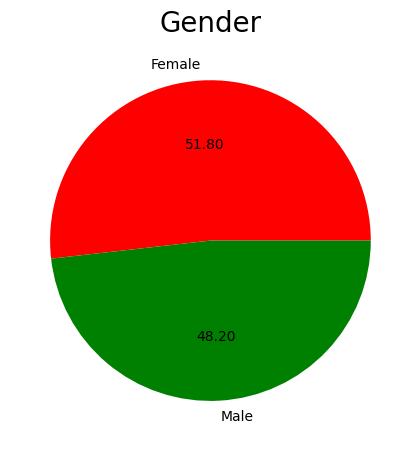

In [47]:
# Multivariate analysis of pie plots

plt.figure(figsize=(30,12))
plt.subplot(1,5,1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red', 'green']

plt.pie(size, colors = color, labels = labels, autopct='%.2f')
plt.title('Gender', fontsize=20)
plt.axis('off')